In [ ]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

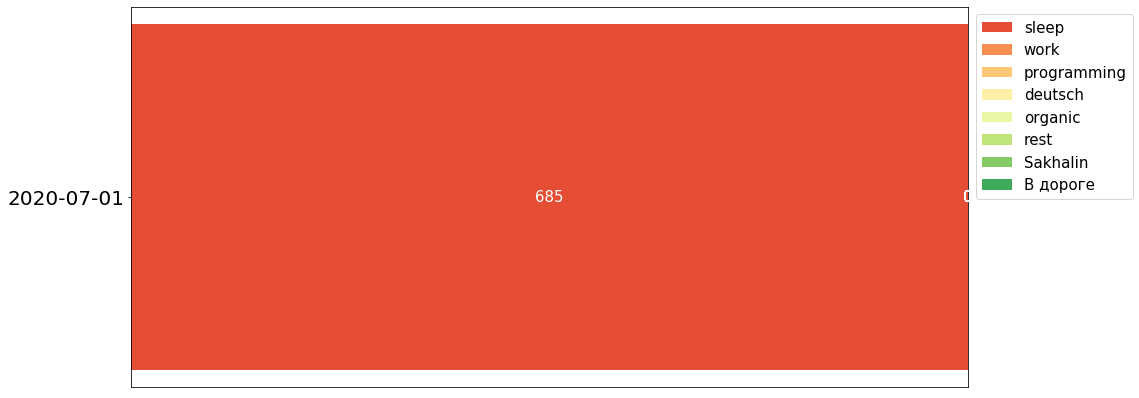

True

<Figure size 432x288 with 0 Axes>

In [59]:
import time
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('..')
import modules.dbmodel as dbmodel
import modules.dbconfig as dbconfig
import modules.functions as functions
import modules.timer as timer

user_id = 122267418

#DATA 
time_netto_min = dbmodel.netto_time_today(user_id)
time_brutto_min = 24*60
wasted_time = time_brutto_min - time_netto_min
categories_list = dbmodel.list_categories(user_id)
ts = time.localtime()
ts = time.strftime("%Y-%m-%d", ts)


#doughnut plot
def draw_douhnut_plot(user_id):
    #DATA
    time_netto_min = dbmodel.netto_time_today(user_id)
    time_brutto_min = 24*60
    wasted_time = time_brutto_min - time_netto_min
    categories_list = dbmodel.list_categories(user_id)
    ts = time.localtime()
    ts = time.strftime("%Y-%m-%d", ts)

    sizes = []
    sizes.append(wasted_time)
    labels = []
    labels.append("time brutto, {}h.{}min.".format(int(wasted_time//60), int(wasted_time%60)))
    sizes.append(time_netto_min)
    labels.append("time netto, {}min.".format(int(time_netto_min)))

    labels = tuple(labels)

    explode = (0, 0.1)
    fig, ax = plt.subplots(figsize=(15, 10), subplot_kw=dict(aspect="equal"))

    wedges, texts = ax.pie(sizes, explode=explode, wedgeprops=dict(width=0.5), shadow=True, startangle=-40)

    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    kw = dict(arrowprops=dict(arrowstyle="-"),
              bbox=bbox_props, zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1)/2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = "angle,angleA=0,angleB={}".format(ang)
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        ax.annotate(labels[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                    horizontalalignment=horizontalalignment, fontsize='20', **kw)

    ax.set_title("потраченное время, \n{}".format(ts), fontsize=25)

    # generation of name
    save_name = "doughnut_{}_{}".format(user_id, ts)

    #saving picture
#     plt.savefig(os.path.join('./src', save_name + '.png'), bbox_inches='tight', transparent=True, pad_inches=0.1)


def draw_barplot(user_id):

    #DATA
    time_netto_min = dbmodel.netto_time_today(user_id)
    time_brutto_min = 24*60
    wasted_time = time_brutto_min - time_netto_min
    categories_list = dbmodel.list_categories(user_id)
    ts = time.localtime()
    ts = time.strftime("%Y-%m-%d", ts)
    # print(ts)
    # print (categories_list, "\n", time_netto_min)

    if time_netto_min == 0:
        return None
    else:
        sizes = []
        sizes.append(wasted_time)
        labels = []
        labels.append("time brutto, {}".format(time_brutto_min))

        for category in categories_list:
            sizes.append(dbmodel.total_time_per_category_today(user_id, category)["total_time"])
            labels.append(dbmodel.total_time_per_category_today(user_id, category)["category"])

        labels = tuple(labels)

        r = [0]
        # raw_data = {'greenBars': [20], 'orangeBars': [5],'blueBars': [2]}

        raw_data = {}
        raw_data[ts] = []
        for category in categories_list:
            raw_data[ts].append(dbmodel.total_time_per_category_today(user_id, category)["total_time"])

        def survey(results, category_names):
            """
            Parameters
            ----------
            results : dict
                A mapping from question labels to a list of answers per category.
                It is assumed all lists contain the same number of entries and that
                it matches the length of *category_names*.
            category_names : list of str
                The category labels.
            """
            labels = list(results.keys())
            data = np.array(list(results.values()))
            data_cum = data.cumsum(axis=1)
            category_colors = plt.get_cmap('RdYlGn')(
                np.linspace(0.15, 0.85, data.shape[1]))

            fig, ax = plt.subplots(figsize=(15, 7))
            ax.invert_yaxis()
            ax.xaxis.set_visible(False)
            ax.set_xlim(0, np.sum(data, axis=1).max())

            for i, (colname, color) in enumerate(zip(category_names, category_colors)):
                widths = data[:, i]
                starts = data_cum[:, i] - widths
                ax.barh(labels, widths, left=starts, height=0.5,
                        label=colname, color=color)
                xcenters = starts + widths / 2

                r, g, b, _ = color
                text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
                for y, (x, c) in enumerate(zip(xcenters, widths)):
                    ax.text(x, y, str(int(c)), ha='center', va='center',
                            color=text_color, fontsize='15')
            ax.legend(ncol=1, bbox_to_anchor=(1, 1), loc="upper left", fontsize='15')
#             best
# 	upper right
# 	upper left
# 	lower left
# 	lower right
# 	right
# 	center left
# 	center right
# 	lower center
# 	upper center
# 	center
            txt = ax.yaxis.get_ticklabels()[-1]
            txt.set_fontstretch('condensed')
            txt.set_fontsize(20)
            return fig, ax

        survey(raw_data, categories_list)
        # generation of name
        save_name = "barplot_{}_{}".format(user_id, ts)
        #saving picture
        plt.show()
        plt.savefig(os.path.join('../src', save_name + '.png'), bbox_inches='tight', transparent=True, pad_inches=0.1)
        return True

draw_barplot(336091411)

In [ ]:
# import pandas as pd
import pandas as pd

# import numpy as np
import numpy as np

# simple array
data = np.array(['g','e','e','k','s'])

ser = pd.Series(data)
print(ser)
